In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('Country-data.csv')

In [4]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [5]:
df=df.drop('country', axis=1)

In [14]:
df

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,2
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,2
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,2
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,1
...,...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,2
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,1
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,2
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,2


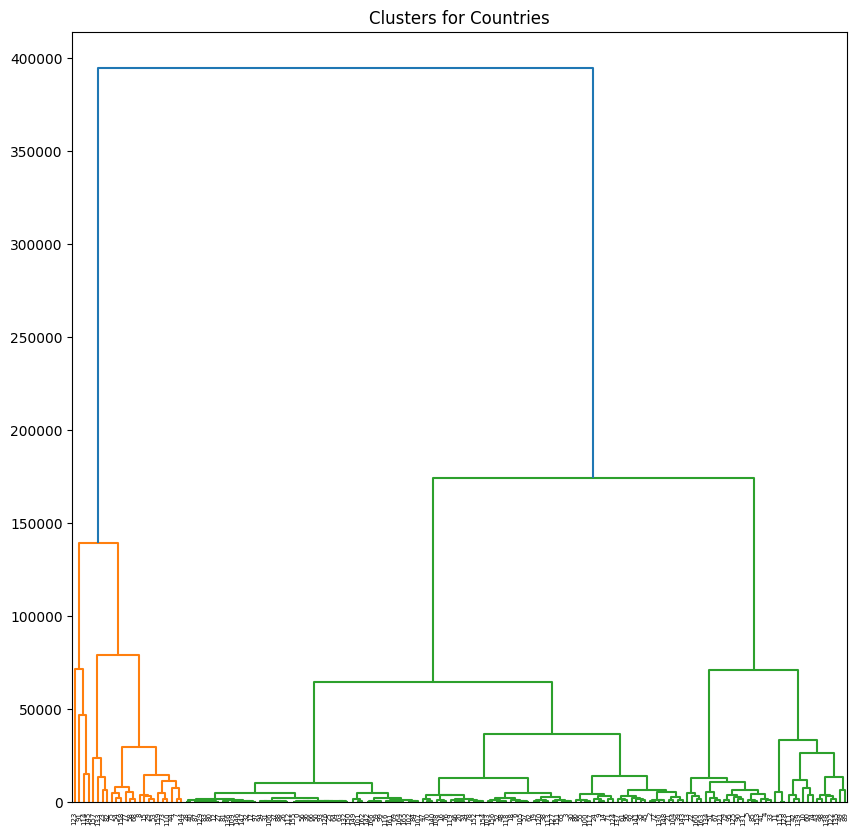

In [6]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,10))
plt.title('Clusters for Countries')
dend=shc.dendrogram(shc.linkage(df, method='ward'))

In [7]:
from sklearn.cluster import AgglomerativeClustering

ag=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
labels=ag.fit_predict((df))

In [8]:
df['cluster']=labels

In [9]:
labels

array([2, 2, 2, 2, 1, 1, 2, 3, 3, 2, 1, 1, 2, 1, 2, 3, 2, 2, 2, 2, 2, 2,
       1, 4, 2, 2, 2, 2, 2, 3, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       3, 2, 2, 2, 2, 1, 2, 1, 2, 3, 3, 2, 2, 2, 3, 2, 1, 2, 2, 2, 2, 2,
       2, 1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 1, 2, 2, 4, 2, 2, 1, 2, 2,
       2, 1, 1, 0, 2, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 1, 2, 2, 0, 1, 2, 2, 2, 2, 2, 1, 1, 0, 2, 1, 2, 2, 1, 2, 2, 1,
       2, 4, 1, 1, 2, 2, 1, 1, 2, 2, 2, 2, 3, 0, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 4, 3, 3, 1, 2, 2, 1, 2, 2, 2], dtype=int64)

In [10]:
df.columns

Index(['child_mort', 'exports', 'health', 'imports', 'income', 'inflation',
       'life_expec', 'total_fer', 'gdpp', 'cluster'],
      dtype='object')

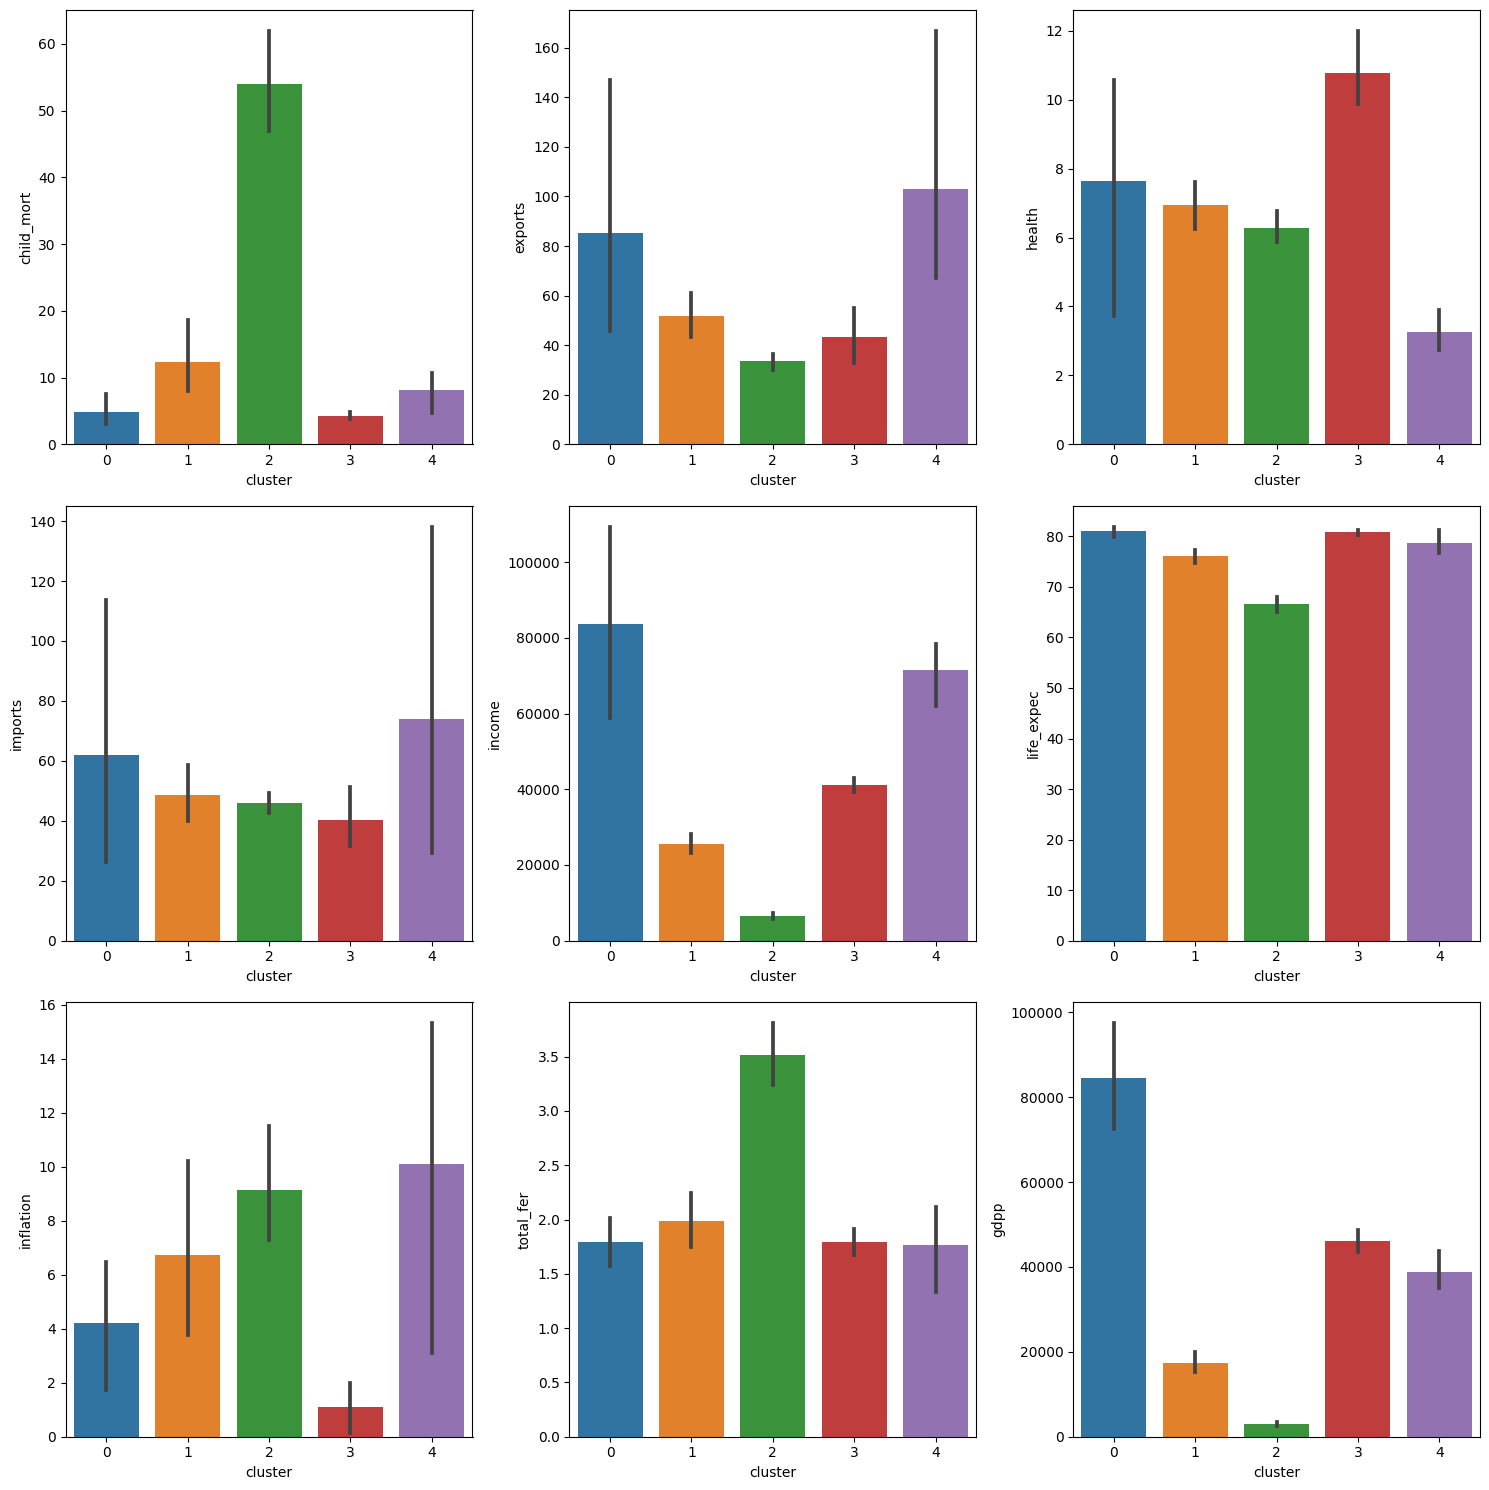

In [11]:
fig, axs = plt.subplots(3,3,figsize = (15,15))

sns.barplot(x=df.cluster, y=df.child_mort, ax = axs[0,0])
sns.barplot(x=df.cluster, y=df.exports, ax = axs[0,1])
sns.barplot(x=df.cluster, y=df.health, ax = axs[0,2])
sns.barplot(x=df.cluster, y=df.imports, ax = axs[1,0])
sns.barplot(x=df.cluster, y=df.income, ax = axs[1,1])
sns.barplot(x=df.cluster, y=df.life_expec, ax = axs[1,2])
sns.barplot(x=df.cluster, y=df.inflation, ax = axs[2,0])
sns.barplot(x=df.cluster, y=df.total_fer, ax = axs[2,1])
sns.barplot(x=df.cluster, y=df.gdpp, ax = axs[2,2])
plt.tight_layout()